In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
generator_input = pd.read_excel("3_1_Generator_Y2019_Early_Release.xlsx", skiprows=2)

In [3]:
generators_2019 = generator_input.iloc[:,[2,3,4,6,7,8,15,25,26]].copy()

In [4]:
generators_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant Code               22701 non-null  int64  
 1   Plant Name               22701 non-null  object 
 2   State                    22701 non-null  object 
 3   Generator ID             22701 non-null  object 
 4   Technology               22701 non-null  object 
 5   Prime Mover              22701 non-null  object 
 6   Nameplate Capacity (MW)  22701 non-null  float64
 7   Operating Month          22701 non-null  object 
 8   Operating Year           22701 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ MB


Convert month and year to numeric data type.

In [5]:
generators_2019['Operating Month'] = pd.to_numeric(generators_2019['Operating Month'],errors="coerce")
generators_2019['Operating Year'] = pd.to_numeric(generators_2019['Operating Year'],errors="coerce")

In [6]:
generators_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant Code               22701 non-null  int64  
 1   Plant Name               22701 non-null  object 
 2   State                    22701 non-null  object 
 3   Generator ID             22701 non-null  object 
 4   Technology               22701 non-null  object 
 5   Prime Mover              22701 non-null  object 
 6   Nameplate Capacity (MW)  22701 non-null  float64
 7   Operating Month          22700 non-null  float64
 8   Operating Year           22700 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [7]:
generators_2019.head()

,Plant Code,Plant Name,State,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Operating Month,Operating Year
0,2,Bankhead Dam,AL,1,Conventional Hydroelectric,HY,53.9,7.0,1963.0
1,3,Barry,AL,1,Natural Gas Steam Turbine,ST,153.1,2.0,1954.0
2,3,Barry,AL,2,Natural Gas Steam Turbine,ST,153.1,7.0,1954.0
3,3,Barry,AL,4,Conventional Steam Coal,ST,403.7,12.0,1969.0
4,3,Barry,AL,5,Conventional Steam Coal,ST,788.8,10.0,1971.0


In [8]:
generators_2019.Technology.unique()

array(['Conventional Hydroelectric', 'Natural Gas Steam Turbine',
       'Conventional Steam Coal', 'Natural Gas Fired Combined Cycle',
       'Natural Gas Fired Combustion Turbine', 'Petroleum Liquids',
       'Natural Gas Internal Combustion Engine', 'Nuclear',
       'Onshore Wind Turbine', 'Solar Photovoltaic',
       'Hydroelectric Pumped Storage', 'Geothermal', 'Landfill Gas',
       'Batteries', 'Wood/Wood Waste Biomass',
       'Coal Integrated Gasification Combined Cycle', 'Other Gases',
       'Petroleum Coke', 'Municipal Solid Waste',
       'Natural Gas with Compressed Air Storage', 'All Other',
       'Other Waste Biomass', 'Solar Thermal without Energy Storage',
       'Other Natural Gas', 'Solar Thermal with Energy Storage',
       'Flywheels', 'Offshore Wind Turbine'], dtype=object)

Natural gas plants represent the largest amount of total nameplate capacity, but there are multiple types of natural gas plants.

In [9]:
generators_2019.groupby('Technology')['Nameplate Capacity (MW)'].sum().sort_values(ascending=False)

Technology
Natural Gas Fired Combined Cycle               305420.4
Conventional Steam Coal                        247389.6
Natural Gas Fired Combustion Turbine           153316.5
Onshore Wind Turbine                           104252.5
Nuclear                                        102877.3
Conventional Hydroelectric                      79689.5
Natural Gas Steam Turbine                       76911.2
Solar Photovoltaic                              35961.8
Petroleum Liquids                               35011.4
Hydroelectric Pumped Storage                    21671.5
Wood/Wood Waste Biomass                          9518.2
Natural Gas Internal Combustion Engine           5211.8
Geothermal                                       3849.3
Other Gases                                      2913.8
Municipal Solid Waste                            2553.2
Landfill Gas                                     2103.9
All Other                                        2010.6
Petroleum Coke                       

Based on the above there appear to be four major types of natural gas plants in use.

In [10]:
gas_plant_types = ['Natural Gas Steam Turbine', 'Natural Gas Fired Combined Cycle','Natural Gas Fired Combustion Turbine', \
            'Natural Gas Internal Combustion Engine']

In [11]:
gas_generators = generators_2019[generators_2019['Technology'].isin(gas_plant_types)].copy()
generators_2019.shape, gas_generators.shape

((22701, 9), (5869, 9))

In [12]:
total_gas_capacity = gas_generators['Nameplate Capacity (MW)'].sum()
total_gas_capacity

540859.9

Natural Gas Internal Combustion Engine units represent a tiny segment of the natural gas generation and will be ignored in subsequent analysis.

In [13]:
gas_generators.groupby('Technology')['Nameplate Capacity (MW)'].sum().sort_values(ascending=False)

Technology
Natural Gas Fired Combined Cycle          305420.4
Natural Gas Fired Combustion Turbine      153316.5
Natural Gas Steam Turbine                  76911.2
Natural Gas Internal Combustion Engine      5211.8
Name: Nameplate Capacity (MW), dtype: float64

Combined cycle type natural gas plants represent the major of natural gas generation capacity.

In [14]:
gas_generators.groupby('Technology')['Nameplate Capacity (MW)'].sum().sort_values(ascending=False)/total_gas_capacity

Technology
Natural Gas Fired Combined Cycle          0.564694
Natural Gas Fired Combustion Turbine      0.283468
Natural Gas Steam Turbine                 0.142202
Natural Gas Internal Combustion Engine    0.009636
Name: Nameplate Capacity (MW), dtype: float64

combined cycle natural gas plants are also the newest type of plant (on average).

In [15]:
gas_generators.groupby('Technology')['Operating Year'].mean()

Technology
Natural Gas Fired Combined Cycle          2000.182335
Natural Gas Fired Combustion Turbine      1995.771366
Natural Gas Internal Combustion Engine    1994.678700
Natural Gas Steam Turbine                 1968.980180
Name: Operating Year, dtype: float64

In [16]:
gas_generators.groupby('Technology')['Nameplate Capacity (MW)'].mean()

Technology
Natural Gas Fired Combined Cycle          157.758471
Natural Gas Fired Combustion Turbine       67.540308
Natural Gas Internal Combustion Engine      4.703791
Natural Gas Steam Turbine                 138.578739
Name: Nameplate Capacity (MW), dtype: float64

In [17]:
def unit_ID(plant, generator):
    return str(plant) + "-" + str(generator)

In [18]:
f1 = lambda x: unit_ID(x['Plant Code'],x['Generator ID'])

In [19]:
gas_generators['Unit Code'] = gas_generators.apply(f1, axis=1)

In [20]:
gas_generators = pd.get_dummies(gas_generators, columns = ['Technology'])

In [21]:
gas_rename = {'Technology_Natural Gas Fired Combined Cycle': "Combined Cycle Units",\
       'Technology_Natural Gas Fired Combustion Turbine': "Gas Turbine Units",\
       'Technology_Natural Gas Internal Combustion Engine': "Gas Engine Units",\
       'Technology_Natural Gas Steam Turbine':"Gas Steam Turbine Units"}

In [22]:
gas_generators.rename(columns=gas_rename,inplace=True)

In [23]:
gas_generators['Combined Cycle MW'] = gas_generators['Combined Cycle Units']*gas_generators['Nameplate Capacity (MW)']
gas_generators['Gas Turbine MW'] = gas_generators['Gas Turbine Units']*gas_generators['Nameplate Capacity (MW)']
gas_generators['Gas Engine MW'] = gas_generators['Gas Engine Units']*gas_generators['Nameplate Capacity (MW)']
gas_generators['Gas Steam Turbine MW'] = gas_generators['Gas Steam Turbine Units']*gas_generators['Nameplate Capacity (MW)']

In [24]:
gas_generators.head()

,Plant Code,Plant Name,State,Generator ID,Prime Mover,Nameplate Capacity (MW),Operating Month,Operating Year,Unit Code,Combined Cycle Units,Gas Turbine Units,Gas Engine Units,Gas Steam Turbine Units,Combined Cycle MW,Gas Turbine MW,Gas Engine MW,Gas Steam Turbine MW
1,3,Barry,AL,1,ST,153.1,2.0,1954.0,3-1,0,0,0,1,0.0,0.0,0.0,153.1
2,3,Barry,AL,2,ST,153.1,7.0,1954.0,3-2,0,0,0,1,0.0,0.0,0.0,153.1
5,3,Barry,AL,A1CT,CT,170.1,5.0,2000.0,3-A1CT,1,0,0,0,170.1,0.0,0.0,0.0
6,3,Barry,AL,A1CT2,CT,170.1,5.0,2000.0,3-A1CT2,1,0,0,0,170.1,0.0,0.0,0.0
7,3,Barry,AL,A1ST,CA,195.2,5.0,2000.0,3-A1ST,1,0,0,0,195.2,0.0,0.0,0.0


In [25]:
gas_generators.columns

Index(['Plant Code', 'Plant Name', 'State', 'Generator ID', 'Prime Mover',
       'Nameplate Capacity (MW)', 'Operating Month', 'Operating Year',
       'Unit Code', 'Combined Cycle Units', 'Gas Turbine Units',
       'Gas Engine Units', 'Gas Steam Turbine Units', 'Combined Cycle MW',
       'Gas Turbine MW', 'Gas Engine MW', 'Gas Steam Turbine MW'],
      dtype='object')

In [26]:
gas_agg = {'Plant Name':"first", 'State':"first",'Generator ID':"count",'Combined Cycle Units':"sum", \
           'Gas Turbine Units':"sum",'Gas Engine Units':"sum", 'Gas Steam Turbine Units':"sum", 'Combined Cycle MW':"sum",\
       'Gas Turbine MW':"sum", 'Gas Engine MW':"sum", 'Gas Steam Turbine MW':"sum",'Nameplate Capacity (MW)':"sum",\
           'Operating Year':"last", 'Operating Month':"last"}

In [27]:
gas_plants = gas_generators.groupby('Plant Code').agg(gas_agg)
gas_plants.rename(columns = {'Generator ID':"total units"}, inplace=True)
gas_plants.shape

(1787, 14)

In [28]:
gas_plants.head(10)

,Plant Name,State,total units,Combined Cycle Units,Gas Turbine Units,Gas Engine Units,Gas Steam Turbine Units,Combined Cycle MW,Gas Turbine MW,Gas Engine MW,Gas Steam Turbine MW,Nameplate Capacity (MW),Operating Year,Operating Month
Plant Code,,,,,,,,,,,,,,
3,Barry,AL,8,6,0,0,2,1070.8,0.0,0.0,306.2,1377.0,2000.0,5.0
7,Gadsden,AL,2,0,0,0,2,0.0,0.0,0.0,138.0,138.0,1949.0,7.0
9,Copper,TX,1,0,1,0,0,0.0,86.9,0.0,0.0,86.9,1980.0,7.0
10,Greene County,AL,11,0,9,0,2,0.0,720.0,0.0,568.4,1288.4,1996.0,5.0
26,E C Gaston,AL,4,0,0,0,4,0.0,0.0,0.0,1060.8,1060.8,1962.0,6.0
30,Madelia,MN,5,0,0,5,0,0.0,0.0,11.8,0.0,11.8,1954.0,3.0
47,Colbert,AL,8,0,8,0,0,0.0,476.0,0.0,0.0,476.0,1972.0,9.0
54,J K Smith,KY,9,0,9,0,0,0.0,1055.0,0.0,0.0,1055.0,2010.0,5.0
75,Anchorage 1,AK,2,0,2,0,0,0.0,75.9,0.0,0.0,75.9,1972.0,3.0


There are 459 combined cycle gas power stations in the U.S.

In [29]:
combined = gas_plants[(gas_plants['Gas Turbine Units']==0)&(gas_plants['Gas Engine Units']==0)\
                     &(gas_plants['Gas Steam Turbine Units']==0)].copy()

combined_plant_codes = combined.index.tolist()
combined.shape

(459, 14)

In [30]:
gas_turbine = gas_plants[(gas_plants['Combined Cycle Units']==0)&(gas_plants['Gas Engine Units']==0)\
                     &(gas_plants['Gas Steam Turbine Units']==0)].copy()
gas_turbine.shape

(720, 14)

There are a number of stations which include both combined cycle units and gas turbine units.

In [31]:
mixed_1 = gas_plants[(gas_plants['Combined Cycle Units']>0)&(gas_plants['Gas Steam Turbine Units']>0)].copy()
mixed_2 = gas_plants[(gas_plants['Combined Cycle Units']>0)&(gas_plants['Gas Turbine Units']>0)].copy()
mixed_gas = pd.concat([mixed_1, mixed_2])
mixed_gas.shape

(91, 14)

In [32]:
combined['Nameplate Capacity (MW)'].sum(), gas_turbine['Nameplate Capacity (MW)'].sum(), mixed_gas['Nameplate Capacity (MW)'].sum()

(265247.9, 129034.0, 73425.3)

In [33]:
combined['Nameplate Capacity (MW)'].mean(), combined['Nameplate Capacity (MW)'].median()

(577.8821350762527, 556.0)

In [34]:
gas_turbine['Nameplate Capacity (MW)'].mean(), gas_turbine['Nameplate Capacity (MW)'].median()

(179.21388888888896, 71.6)

The stations containing both gas turbine and combined cycle units are the largest on average.

In [35]:
mixed_gas['Nameplate Capacity (MW)'].mean(), mixed_gas['Nameplate Capacity (MW)'].median()

(806.871428571429, 678.1)

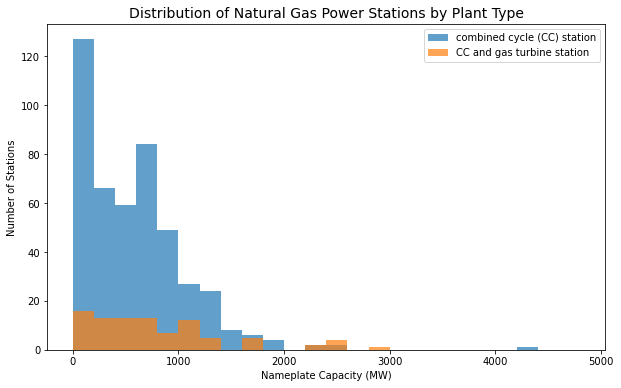

In [36]:
bins=[x for x in range(0,5000,200)]
plt.figure(figsize=(10,6))
plt.title("Distribution of Natural Gas Power Stations by Plant Type",fontsize=14)
plt.hist(combined['Nameplate Capacity (MW)'], bins=bins, label="combined cycle (CC) station", alpha=0.7)
plt.hist(mixed_gas['Nameplate Capacity (MW)'], bins=bins, label="CC and gas turbine station", alpha=0.7)
#plt.hist(gas_turbine['Nameplate Capacity (MW)'], bins=bins, label = "gas turbine", alpha=0.7)
plt.xlabel("Nameplate Capacity (MW)")
plt.ylabel("Number of Stations")
plt.legend()
plt.show()

In [37]:
large_gas_plants = gas_plants[gas_plants['Nameplate Capacity (MW)']>=1000]
large_gas_plants['Nameplate Capacity (MW)'].describe()

count     131.000000
mean     1421.685496
std       459.446157
min      1000.000000
25%      1140.300000
50%      1271.600000
75%      1539.000000
max      4263.000000
Name: Nameplate Capacity (MW), dtype: float64

Load in annual production data.  This will support determining capacity factors.  Capacity factor is a metric representing the fraction of the time a station is operating at full capacity.

In [38]:
data_2019 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2019_Final.xlsx",skiprows = 5)

In [39]:
prod_2019 = data_2019.iloc[:,[0,3,6,14,15,79,80,81,82,83,84,85,86,87,88,89,90,95,96]].copy()
prod_2019.head()

,Plant Id,Plant Name,Plant State,Reported\nFuel Type Code,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours),YEAR
0,1,Sand Point,AK,DFO,DFO,195.676,217.498,215.544,198.082,215.578,185.236,210.989,233.607,277.39,291.533,221.449,295.418,2758.0,2019
1,1,Sand Point,AK,WND,WND,88.072,80.613,90.25,100.908,89.021,76.538,75.28,68.051,83.408,94.562,85.813,89.484,1022.0,2019
2,2,Bankhead Dam,AL,WAT,HYC,-23.567,-22.044,-25.812,-26.452,-31.6,-27.586,-23.829,-22.872,-18.33,-18.28,-21.282,-22.346,-284.0,2019
3,3,Barry,AL,NG,NG,249734,239279,260061,166618,241896,252882,253399,267202,255971,255736,250232,131877,2824887.0,2019
4,3,Barry,AL,NG,NG,469654,449491,487355,313253,460403,475069,476259,500818,476004,472701,471065,254319,5306391.0,2019


In [40]:
gas_prod = prod_2019[data_2019['AER\nFuel Type Code']=='NG'].copy()
gas_prod.shape

(3307, 19)

In [41]:
monthly_totals = ['Netgen\nJanuary', 'Netgen\nFebruary', 'Netgen\nMarch', 'Netgen\nApril', 'Netgen\nMay', \
        'Netgen\nJune','Netgen\nJuly', 'Netgen\nAugust', 'Netgen\nSeptember','Netgen\nOctober', 'Netgen\nNovember', \
                  'Netgen\nDecember']

In [42]:
for i in monthly_totals:
    gas_prod[i] = pd.to_numeric(gas_prod[i],errors="coerce")

In [43]:
gas_plants_prod = gas_prod.groupby('Plant Id').agg({'Plant Name':"first",'Plant State':"first", \
                    'AER\nFuel Type Code':"last",'Netgen\nJanuary':"sum", 'Netgen\nFebruary':"sum",\
                   'Netgen\nMarch':"sum", 'Netgen\nApril':"sum", 'Netgen\nMay':"sum", 'Netgen\nJune':"sum",\
                   'Netgen\nJuly':"sum", 'Netgen\nAugust':"sum", 'Netgen\nSeptember':"sum",\
                   'Netgen\nOctober':"sum", 'Netgen\nNovember':"sum", 'Netgen\nDecember':"sum",'Net Generation\n(Megawatthours)':"sum"}) 

In [44]:
gas_plants_prod.shape

(2454, 16)

In [45]:
gas_plants_prod.head()

,Plant Name,Plant State,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours)
Plant Id,,,,,,,,,,,,,,,,
3,Barry,AL,NG,729953.134,693271.683,761560.442,481774.629,728885.760,735245.099,750253.763,776810.059,770841.575,738677.970,740281.661,388347.033,8295902.810
7,Gadsden,AL,NG,13131.000,11972.000,13250.000,16936.000,15347.000,10074.000,15321.000,15126.000,14625.000,15199.000,14264.000,14732.000,169977.000
9,Copper,TX,NG,3062.439,2461.985,2645.439,2383.666,3242.429,3740.568,4304.225,4633.971,4005.006,3105.509,2816.874,3131.889,39534.000
10,Greene County,AL,NG,57593.000,54132.000,68083.000,108058.000,181918.000,190911.000,238731.000,230341.000,210875.000,190151.959,111457.927,125533.000,1767784.886
26,E C Gaston,AL,NG,56294.207,36582.859,213648.380,241312.420,391133.420,366001.630,411000.610,425005.750,367345.430,326445.460,48189.677,17222.000,2900181.800


In [46]:
len(combined_plant_codes)

459

In [47]:
combined_performance = pd.merge(combined, gas_plants_prod, how='inner', left_index=True, right_index=True)
combined_performance.shape

(457, 30)

In [48]:
combined_performance.head()

,Plant Name_x,State,total units,Combined Cycle Units,Gas Turbine Units,Gas Engine Units,Gas Steam Turbine Units,Combined Cycle MW,Gas Turbine MW,Gas Engine MW,...,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours)
201,Thomas Fitzhugh,AR,2,2,0,0,0,185.0,0.0,0.0,...,4811.000,40419.000,30948.000,27776.000,34597.000,27807.000,6333.000,38720.000,15564.000,254918.00
260,Dynegy Moss Landing Power Plant,CA,6,6,0,0,0,1398.0,0.0,0.0,...,283181.000,127686.000,223912.000,409045.000,452957.000,457790.000,483376.000,568451.000,602213.000,5220833.00
358,Mountainview Generating Station,CA,6,6,0,0,0,1036.8,0.0,0.0,...,130650.270,41767.230,67181.230,308599.680,461060.400,323613.340,277753.680,530141.860,282662.850,3040688.10
533,McWilliams,AL,7,7,0,0,0,654.0,0.0,0.0,...,153068.000,369445.500,356380.000,382497.000,386356.000,357004.000,126387.000,77102.000,361027.000,3559636.20
564,Stanton Energy Center,FL,2,2,0,0,0,333.0,0.0,0.0,...,105961.759,139796.166,176285.744,116499.683,197355.532,171279.849,136486.695,173800.878,226295.804,1894698.03


In [49]:
days = [31,28,31,30,31,30,31,31,30,31,30,31]
month_cf = ['Jan_cf', 'Feb_cf', 'Mar_cf','Apr_cf','May_cf','Jun_cf','Jul_cf','Aug_cf','Sep_cf','Oct_cf','Nov_cf','Dec_cf']

In [50]:
monthly_gen = ['Netgen\nJanuary','Netgen\nFebruary','Netgen\nMarch','Netgen\nApril','Netgen\nMay','Netgen\nJune',\
 'Netgen\nJuly','Netgen\nAugust','Netgen\nSeptember','Netgen\nOctober','Netgen\nNovember','Netgen\nDecember']

In [51]:
combined_performance['cap_factor'] = combined_performance['Net Generation\n(Megawatthours)']/(365*24*combined_performance['Nameplate Capacity (MW)'])
for i in range(0,12):
    combined_performance[month_cf[i]] = combined_performance[monthly_gen[i]]/(days[i]*24*combined_performance['Nameplate Capacity (MW)'])

In [52]:
combined_performance.head()

,Plant Name_x,State,total units,Combined Cycle Units,Gas Turbine Units,Gas Engine Units,Gas Steam Turbine Units,Combined Cycle MW,Gas Turbine MW,Gas Engine MW,...,Mar_cf,Apr_cf,May_cf,Jun_cf,Jul_cf,Aug_cf,Sep_cf,Oct_cf,Nov_cf,Dec_cf
201,Thomas Fitzhugh,AR,2,2,0,0,0,185.0,0.0,0.0,...,0.000000,0.036119,0.293657,0.232342,0.201802,0.251359,0.208761,0.046011,0.290691,0.113078
260,Dynegy Moss Landing Power Plant,CA,6,6,0,0,0,1398.0,0.0,0.0,...,0.458605,0.281335,0.122762,0.222453,0.393270,0.435489,0.454806,0.464735,0.564746,0.578989
358,Mountainview Generating Station,CA,6,6,0,0,0,1036.8,0.0,0.0,...,0.244141,0.175018,0.054146,0.089995,0.400062,0.597709,0.433510,0.360074,0.710174,0.366438
533,McWilliams,AL,7,7,0,0,0,654.0,0.0,0.0,...,0.724527,0.325068,0.759276,0.756838,0.786099,0.794030,0.758163,0.259748,0.163740,0.741975
564,Stanton Energy Center,FL,2,2,0,0,0,333.0,0.0,0.0,...,0.637843,0.441949,0.564258,0.735259,0.470227,0.796585,0.714380,0.550900,0.724895,0.913396


In [53]:
combined_performance['Net Generation\n(Megawatthours)'].sum()/(24*365*combined_performance['Nameplate Capacity (MW)'].sum())

0.5019719440052028

The aggregatie capacity factor for the combined cycle stations is 50%, however the average of the capacity factor of the individual stations is lower (45%).  This indicates that the larger capacity stations will tend to operate closer to full capacity.

In [54]:
combined_performance['cap_factor'].describe()

count    457.000000
mean       0.446169
std        0.245854
min       -0.000548
25%        0.272312
50%        0.477634
75%        0.631451
max        1.129906
Name: cap_factor, dtype: float64

We see a seasonal variation, with the highest capacity factors in the summer.  This is expected, U.S. electricity demand is seasonal, with highest demand driven by air conditioning needs in summer.

In [55]:
for i in range(0,12):
    print(month_cf[i] + ": " +str(combined_performance[monthly_gen[i]].sum()/(24*days[i]*combined_performance['Nameplate Capacity (MW)'].sum())))

Jan_cf: 0.46359895135163887
Feb_cf: 0.47759101660310604
Mar_cf: 0.4406649389581867
Apr_cf: 0.395127378810252
May_cf: 0.429820458879262
Jun_cf: 0.5318834464861236
Jul_cf: 0.6278808409852799
Aug_cf: 0.6343685893891616
Sep_cf: 0.5689169927489675
Oct_cf: 0.4800197614389701
Nov_cf: 0.4593485470304539
Dec_cf: 0.5103858187231918


In [56]:
turbine_performance = pd.merge(gas_turbine, gas_plants_prod, how='inner', left_index=True, right_index=True)
turbine_performance.shape

(709, 30)

In [57]:
turbine_performance['cap_factor'] = turbine_performance['Net Generation\n(Megawatthours)']/(365*24*turbine_performance['Nameplate Capacity (MW)'])
for i in range(0,12):
    turbine_performance[month_cf[i]] = turbine_performance[monthly_gen[i]]/(days[i]*24*turbine_performance['Nameplate Capacity (MW)'])

In [58]:
turbine_performance['Net Generation\n(Megawatthours)'].sum()/(24*365*turbine_performance['Nameplate Capacity (MW)'].sum())

0.08969324144110016

In [59]:
turbine_performance['cap_factor'].describe()

count    709.000000
mean       0.218220
std        0.346864
min       -0.002418
25%        0.008955
50%        0.050739
75%        0.366813
max        5.023055
Name: cap_factor, dtype: float64

Gas turbine plants operate at a much lower capacity factor than combined cycle plants.

In [60]:
for i in range(0,12):
    print(month_cf[i] + ": " +str(turbine_performance[monthly_gen[i]].sum()/(24*days[i]*turbine_performance['Nameplate Capacity (MW)'].sum())))

Jan_cf: 0.07724097576374325
Feb_cf: 0.07849148507718132
Mar_cf: 0.07403178165681859
Apr_cf: 0.07685334439544403
May_cf: 0.08055482531793173
Jun_cf: 0.08705675295511314
Jul_cf: 0.1158227030826623
Aug_cf: 0.11756466252779899
Sep_cf: 0.10438594750002185
Oct_cf: 0.09455975947422539
Nov_cf: 0.0860323362172491
Dec_cf: 0.08249690789062371


In [61]:
mixed_performance = pd.merge(mixed_gas, gas_plants_prod, how='inner', left_index=True, right_index=True)
mixed_performance.shape

(91, 30)

In [62]:
mixed_performance['cap_factor'] = mixed_performance['Net Generation\n(Megawatthours)']/(365*24*mixed_performance['Nameplate Capacity (MW)'])
for i in range(0,12):
    mixed_performance[month_cf[i]] = mixed_performance[monthly_gen[i]]/(days[i]*24*mixed_performance['Nameplate Capacity (MW)'])

In [63]:
mixed_performance['Net Generation\n(Megawatthours)'].sum()/(24*365*mixed_performance['Nameplate Capacity (MW)'].sum())

0.34428536053792114

In [64]:
mixed_performance['cap_factor'].describe()

count    91.000000
mean      0.290978
std       0.197731
min       0.003567
25%       0.112526
50%       0.269357
75%       0.456291
max       0.764341
Name: cap_factor, dtype: float64

In [65]:
for i in range(0,12):
    print(month_cf[i] + ": " +str(mixed_performance[monthly_gen[i]].sum()/(24*days[i]*mixed_performance['Nameplate Capacity (MW)'].sum())))

Jan_cf: 0.33271064854751287
Feb_cf: 0.3198083531266925
Mar_cf: 0.282858026991341
Apr_cf: 0.283181888259224
May_cf: 0.3038287884904574
Jun_cf: 0.3622823772936577
Jul_cf: 0.43180688678563217
Aug_cf: 0.4519560565130864
Sep_cf: 0.3940928216992114
Oct_cf: 0.326592503350893
Nov_cf: 0.3113065364655567
Dec_cf: 0.3277830234353168


Let's just consider the plants which produce the most power annually (regardless of type of plant).

In [66]:
largest_prod_list = gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=100).index.tolist()
largest_prod = gas_plants_prod[gas_plants_prod.index.isin(largest_prod_list)]
largest_prod.shape

(100, 16)

In [67]:
large_performance = pd.merge(gas_plants, largest_prod, how='inner', left_index=True, right_index=True)
large_performance.shape

(100, 30)

In [68]:
large_performance['Net Generation\n(Megawatthours)'].sum()/(24*365*large_performance['Nameplate Capacity (MW)'].sum())

0.5911607002635183

In [69]:
large_performance['cap_factor'] = large_performance['Net Generation\n(Megawatthours)']/(365*24*large_performance['Nameplate Capacity (MW)'])
for i in range(0,12):
    large_performance[month_cf[i]] = large_performance[monthly_gen[i]]/(days[i]*24*large_performance['Nameplate Capacity (MW)'])

In general, it looks like the highest producing plants have higher capacity factors than associated with any specific type of plant.  So size clearly matters here.

In [70]:
large_performance['cap_factor'].describe()

count    100.000000
mean       0.614095
std        0.134134
min        0.329626
25%        0.520131
50%        0.606801
75%        0.713017
max        0.962151
Name: cap_factor, dtype: float64

In [71]:
large_performance['Nameplate Capacity (MW)'].describe()

count     100.000000
mean     1334.171000
std       551.112838
min       644.000000
25%       994.425000
50%      1201.600000
75%      1437.550000
max      4263.000000
Name: Nameplate Capacity (MW), dtype: float64

In [72]:
for i in range(0,12):
    print(month_cf[i] + ": " +str(large_performance[monthly_gen[i]].sum()/(24*days[i]*large_performance['Nameplate Capacity (MW)'].sum())))

Jan_cf: 0.5568902645280038
Feb_cf: 0.5825840672182523
Mar_cf: 0.5355920164527603
Apr_cf: 0.47770357259510043
May_cf: 0.5562031717384037
Jun_cf: 0.6458884643535199
Jul_cf: 0.6952241327067721
Aug_cf: 0.6999539146083891
Sep_cf: 0.6498535322058916
Oct_cf: 0.563753238318349
Nov_cf: 0.5343809759851706
Dec_cf: 0.593238274767587


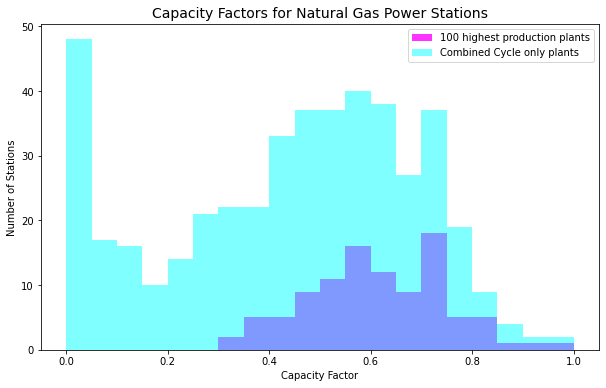

In [73]:
bins = [0,.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
plt.figure(figsize=(10,6))
plt.title("Capacity Factors for Natural Gas Power Stations", fontsize=14)
plt.hist(large_performance['cap_factor'], bins=bins,alpha=0.8, label = '100 highest production plants', color ="magenta")
plt.hist(combined_performance['cap_factor'], bins=bins,alpha=0.5, label = 'Combined Cycle only plants', color = "cyan")
#plt.hist(turbine_performance['cap_factor'], bins=bins,alpha=0.5, label = 'Gas turbine only')
plt.xlabel("Capacity Factor")
plt.ylabel("Number of Stations")
plt.legend()
plt.show()

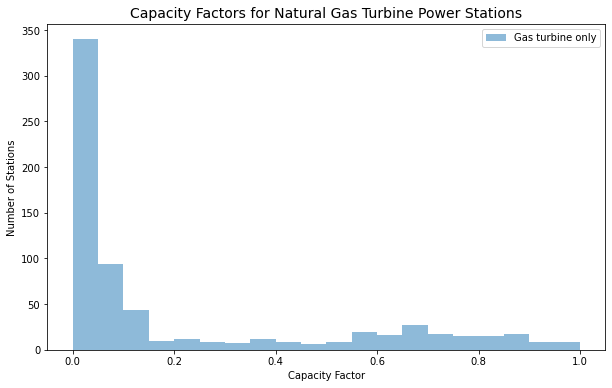

In [74]:
plt.figure(figsize=(10,6))
plt.title("Capacity Factors for Natural Gas Turbine Power Stations", fontsize=14)
#plt.hist(large_performance['cap_factor'], bins=bins,alpha=0.7, label = '100 highest production plants')
#plt.hist(combined_performance['cap_factor'], bins=bins,alpha=0.5, label = 'Combined Cycle only planta')
plt.hist(turbine_performance['cap_factor'], bins=bins,alpha=0.5, label = 'Gas turbine only')
plt.xlabel("Capacity Factor")
plt.ylabel("Number of Stations")
plt.legend()
plt.show()

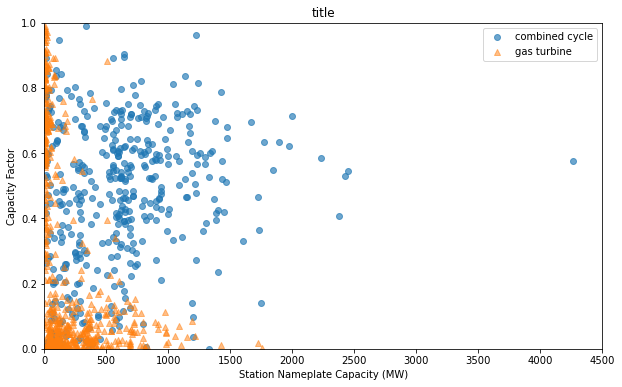

In [75]:
plt.figure(figsize=(10,6))
plt.ylim(0,1)
plt.xlim(0,4500)
plt.title("title")
plt.scatter(combined_performance['Nameplate Capacity (MW)'], combined_performance['cap_factor'],alpha=0.65, label ="combined cycle")
plt.scatter(turbine_performance['Nameplate Capacity (MW)'], turbine_performance['cap_factor'],alpha=0.5,label="gas turbine",marker="^")
#plt.scatter(mixed_performance['Nameplate Capacity (MW)'], mixed_performance['cap_factor'],alpha=0.6, marker="s")
plt.ylabel("Capacity Factor")
plt.xlabel("Station Nameplate Capacity (MW)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


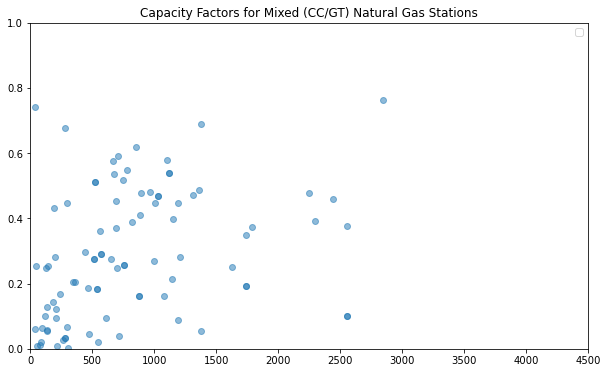

In [76]:
plt.figure(figsize=(10,6))
plt.title("Capacity Factors for Mixed (CC/GT) Natural Gas Stations")
plt.ylim(0,1)
plt.xlim(0,4500)
plt.scatter(mixed_performance['Nameplate Capacity (MW)'], mixed_performance['cap_factor'],alpha=0.5)
plt.legend()
plt.show()

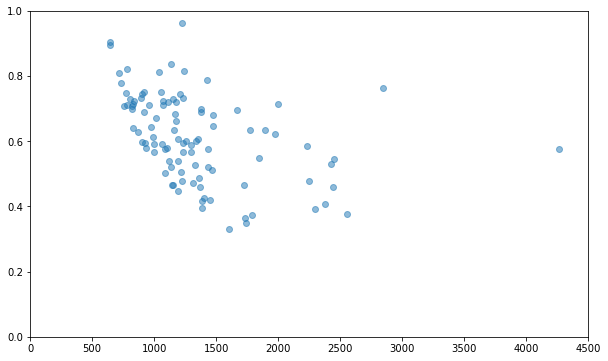

In [77]:
plt.figure(figsize=(10,6))
plt.ylim(0,1)
plt.xlim(0,4500)
#plt.scatter(combined_performance['Nameplate Capacity (MW)'], combined_performance['cap_factor'])
plt.scatter(large_performance['Nameplate Capacity (MW)'], large_performance['cap_factor'],alpha=0.5)
plt.show()

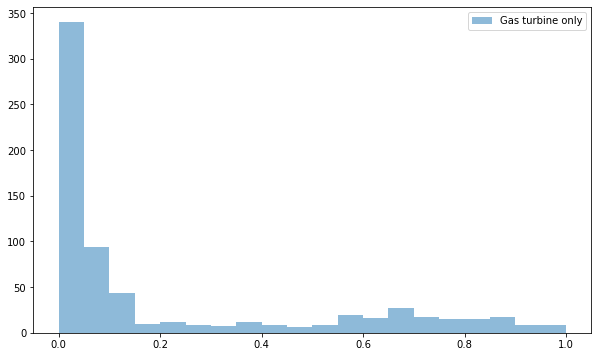

In [78]:

plt.figure(figsize=(10,6))
plt.hist(turbine_performance['cap_factor'], bins=bins,alpha=0.5, label = 'Gas turbine only')
plt.legend()
plt.show()

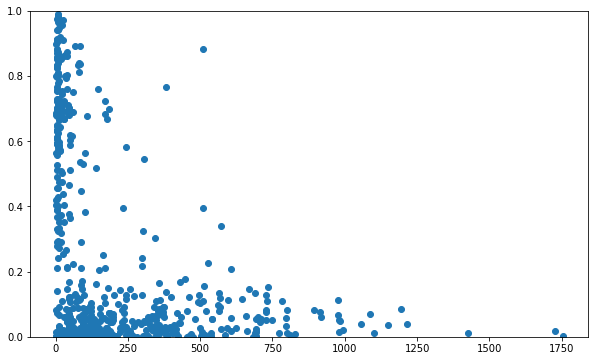

In [79]:
plt.figure(figsize=(10,6))
plt.ylim(0,1)
plt.scatter(turbine_performance['Nameplate Capacity (MW)'], turbine_performance['cap_factor'])
#plt.scatter(large_performance['Nameplate Capacity (MW)'], large_performance['cap_factor'],alpha=0.5)
plt.show()

In [80]:
nuclear_generators = generators_2019[generators_2019['Technology']=='Nuclear'].copy()
nuclear_generators.shape

(96, 9)

There were 96 nuclear units which operated in 2019.

In [81]:
nuclear_generators['Plant Name'].unique()

array(['Browns Ferry', 'Clinton Power Station',
       'Wolf Creek Generating Station', 'Columbia Generating Station',
       'Millstone', 'Turkey Point', 'Vogtle',
       'Dresden Generating Station', 'Quad Cities Generating Station',
       'Duane Arnold Energy Center', 'Palisades', 'Fermi',
       'Monticello Nuclear Facility', 'Prairie Island',
       'PSEG Salem Generating Station', 'Indian Point 2',
       'Nine Mile Point Nuclear Station', 'Peach Bottom', 'H B Robinson',
       'Oconee', 'Surry', 'Point Beach Nuclear Plant', 'Waterford 3',
       'Donald C Cook', 'Joseph M Farley', 'Palo Verde',
       'Calvert Cliffs Nuclear Power Plant', 'Brunswick Nuclear',
       'Harris', 'Perry', 'Braidwood Generation Station',
       'Byron Generating Station', 'LaSalle Generating Station',
       'Catawba', 'McGuire', 'Beaver Valley', 'St Lucie', 'Edwin I Hatch',
       'Grand Gulf', 'Diablo Canyon', 'TalenEnergy Susquehanna',
       'Limerick', 'James A Fitzpatrick', 'Seabrook',
       

Note that Indian Point is a single plant with two units (2 and 3), but each unit has a different plant name.  In order to properly extract the correct number of stations, the names will be corrected to "Indian Point".

In [82]:
nuclear_generators['Plant Name'].replace(to_replace={'Indian Point 3':"Indian Point",'Indian Point 2':"Indian Point"},inplace=True)  

In [83]:
nuclear_stations = nuclear_generators.groupby('Plant Name').agg({'State':"last", 'Nameplate Capacity (MW)':"sum"})
nuclear_stations.shape

(57, 2)

There were a total of 57 operating nuclear power stations in 2019.

In [84]:
nuclear_stations.head()

,State,Nameplate Capacity (MW)
Plant Name,,
Arkansas Nuclear One,AR,1845.0
Beaver Valley,PA,1846.8
Braidwood Generation Station,IL,2449.8
Browns Ferry,AL,3494.0
Brunswick Nuclear,NC,2003.2


In [85]:
prod_2019.head()

,Plant Id,Plant Name,Plant State,Reported\nFuel Type Code,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours),YEAR
0,1,Sand Point,AK,DFO,DFO,195.676,217.498,215.544,198.082,215.578,185.236,210.989,233.607,277.39,291.533,221.449,295.418,2758.0,2019
1,1,Sand Point,AK,WND,WND,88.072,80.613,90.25,100.908,89.021,76.538,75.28,68.051,83.408,94.562,85.813,89.484,1022.0,2019
2,2,Bankhead Dam,AL,WAT,HYC,-23.567,-22.044,-25.812,-26.452,-31.6,-27.586,-23.829,-22.872,-18.33,-18.28,-21.282,-22.346,-284.0,2019
3,3,Barry,AL,NG,NG,249734,239279,260061,166618,241896,252882,253399,267202,255971,255736,250232,131877,2824887.0,2019
4,3,Barry,AL,NG,NG,469654,449491,487355,313253,460403,475069,476259,500818,476004,472701,471065,254319,5306391.0,2019


In [86]:
nuclear_prod_19 = prod_2019[prod_2019['AER\nFuel Type Code']=='NUC'].copy()
nuclear_prod_19.shape

(98, 19)

Based on production data, there were 98 nuclear units in 2019, this is two more than were indicated based on the list of
generating facilities.

In [87]:
nuc_prod_plants_19 = nuclear_prod_19['Plant Name'].unique().tolist()

In [88]:
nuc_generators_plants = nuclear_generators['Plant Name'].unique().tolist()

In [89]:
np.setdiff1d(nuc_generators_plants,nuc_prod_plants_19), np.setdiff1d(nuc_prod_plants_19,nuc_generators_plants)

(array(['Indian Point'], dtype='<U34'),
 array(['Indian Point 2', 'Indian Point 3',
        'Pilgrim Nuclear Power Station', 'Three Mile Island'], dtype='<U34'))

The Indian Point naming issue was previously identified, but Pilgrim and Three Mile Island were plants which shutdown during calendar year 2019.  However, they did produce power in 2019 (as evidenced by their presence in the production dataset) and for completeness should be included in the evaluation of capacity factor.  We will need to obtain plant capacity data from a CY2018 data source.

In [90]:
generator_input_2018 = pd.read_excel("3_1_Generator_Y2018.xlsx", skiprows=1)

In [91]:
generators_2018 = generator_input_2018.iloc[:,[2,3,4,6,7,8,15,25,26]].copy()

In [92]:
generators_2018.head()

,Plant Code,Plant Name,State,Generator ID,Technology,Prime Mover,Nameplate Capacity (MW),Operating Month,Operating Year
0,2.0,Bankhead Dam,AL,1,Conventional Hydroelectric,HY,53.9,7.0,1963.0
1,3.0,Barry,AL,1,Natural Gas Steam Turbine,ST,153.1,2.0,1954.0
2,3.0,Barry,AL,2,Natural Gas Steam Turbine,ST,153.1,7.0,1954.0
3,3.0,Barry,AL,4,Conventional Steam Coal,ST,403.7,12.0,1969.0
4,3.0,Barry,AL,5,Conventional Steam Coal,ST,788.8,10.0,1971.0


In [93]:
nuclear_generators_2018 = generators_2018[generators_2018['Technology']=='Nuclear'].copy()
nuclear_generators_2018.shape

(98, 9)

In [94]:
nuclear_generators_2018['Plant Name'].replace(to_replace={'Indian Point 3':"Indian Point",'Indian Point 2':"Indian Point"},inplace=True)  

In [95]:
nuc_generators_plants_2018 = nuclear_generators_2018['Plant Name'].unique().tolist()

In [96]:
np.setdiff1d(nuc_generators_plants_2018,nuc_prod_plants_19), np.setdiff1d(nuc_prod_plants_19,nuc_generators_plants_2018)

(array(['Indian Point'], dtype='<U34'),
 array(['Indian Point 2', 'Indian Point 3'], dtype='<U34'))

The 2018 list includes all of the plants which operated in 2019.

In [97]:
nuclear_stations = nuclear_generators_2018.groupby('Plant Name').agg({'Generator ID':"count", 'Nameplate Capacity (MW)':"sum"})
nuclear_stations.shape

(59, 2)

So the most correct data for 2019 is that there were 98 units and 59 stations which operated during the year.  However, two
stations, Pilgirm and TMW (each with one unit) were permanently inactivated during the year, so at the end of 2019 there were 96 operating units at 57 separate stations. This is an example of why data continuity checks are important and how subject matter knowledge (awareness of plant inactivations) may be necessary to ensure the most correct data is used.

In [98]:
nuclear_prod_19['Plant Name'].replace(to_replace={'Indian Point 3':"Indian Point",'Indian Point 2':"Indian Point"},inplace=True)  

In [99]:
nuclear_prod_19_stations = nuclear_prod_19.groupby('Plant Name').agg({'Plant State':"first", \
                    'AER\nFuel Type Code':"last",'Netgen\nJanuary':"sum", 'Netgen\nFebruary':"sum",\
                   'Netgen\nMarch':"sum", 'Netgen\nApril':"sum", 'Netgen\nMay':"sum", 'Netgen\nJune':"sum",\
                   'Netgen\nJuly':"sum", 'Netgen\nAugust':"sum", 'Netgen\nSeptember':"sum",\
                   'Netgen\nOctober':"sum", 'Netgen\nNovember':"sum", 'Netgen\nDecember':"sum",'Net Generation\n(Megawatthours)':"sum"})
nuclear_prod_19_stations.shape

(59, 15)

In [100]:
nuclear_prod_19_stations.head()

,Plant State,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours)
Plant Name,,,,,,,,,,,,,,,
Arkansas Nuclear One,AR,NUC,1389566,1243888,1364841,1332697,1200079,596530,660202,1352797,1309963,826357,910614,1387413,13574947.0
Beaver Valley,PA,NUC,1393366,1256203,1380532,1320761,1366244,1306762,1344244,1353568,1257007,874858,1210506,1392419,15456470.0
Braidwood Generation Station,IL,NUC,1788805,1616748,1786313,1725411,1775688,1705590,1713430,1735984,1610607,1271291,1732484,1788789,20251140.0
Browns Ferry,AL,NUC,2677940,2351969,1645879,2278510,2693784,2608289,2619186,2681415,2339956,2509767,2332120,2781085,29519900.0
Brunswick Nuclear,NC,NUC,1361320,1249075,653858,595650,1404967,1314015,1397585,1396042,1161163,1406580,1363766,1412735,14716756.0


In [101]:
nuclear_stations.rename(columns={'Generator ID':"# of Units"},inplace=True)
nuclear_stations.head()

,# of Units,Nameplate Capacity (MW)
Plant Name,,
Arkansas Nuclear One,2,1845.0
Beaver Valley,2,1846.8
Braidwood Generation Station,2,2449.8
Browns Ferry,3,3494.0
Brunswick Nuclear,2,2003.2


In [102]:
nuclear_stations['Nameplate Capacity (MW)'].describe()

count      59.000000
mean     1767.291525
std       757.440677
min       614.000000
25%      1193.000000
50%      1828.700000
75%      2331.500000
max      4209.600000
Name: Nameplate Capacity (MW), dtype: float64

In [103]:
nuclear_stations['# of Units'].value_counts()

2    33
1    23
3     3
Name: # of Units, dtype: int64

In [104]:
one_unit = nuclear_stations[nuclear_stations['# of Units'] ==1]
multi_unit = nuclear_stations[nuclear_stations['# of Units'] >1]
two_unit = nuclear_stations[nuclear_stations['# of Units'] ==2]
three_unit = nuclear_stations[nuclear_stations['# of Units'] ==3]

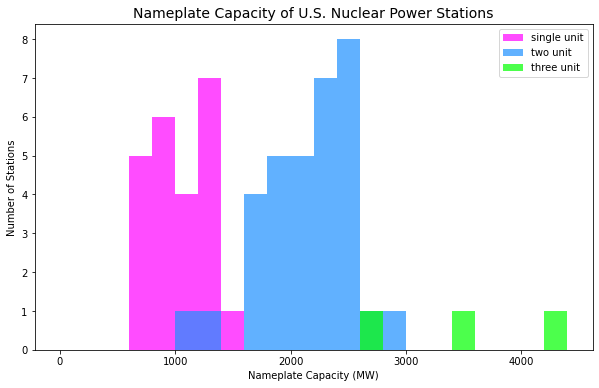

In [105]:
bins=[x for x in range(0,4600,200)]
plt.figure(figsize=(10,6))
plt.title("Nameplate Capacity of U.S. Nuclear Power Stations",fontsize=14)
#plt.hist(nuclear_stations['Nameplate Capacity (MW)'], bins=bins, label="single unit", alpha=0.7)
plt.hist(one_unit['Nameplate Capacity (MW)'], bins=bins, label="single unit", alpha=0.7, color="magenta")
plt.hist(two_unit['Nameplate Capacity (MW)'], bins=bins, label="two unit", alpha=0.7, color="dodgerblue")
plt.hist(three_unit['Nameplate Capacity (MW)'], bins=bins, label="three unit", alpha=0.7,color="lime")
plt.xlabel("Nameplate Capacity (MW)")
plt.ylabel("Number of Stations")
plt.legend()
plt.show()

In [106]:
nuclear_performance = pd.merge(nuclear_stations, nuclear_prod_19_stations, how='inner', left_index=True, right_index=True)
nuclear_performance.shape

(59, 17)

In [107]:
nuclear_performance['Net Generation\n(Megawatthours)'].sum()/(24*365*nuclear_performance['Nameplate Capacity (MW)'].sum())

0.8861430934237075

The gross aggregate capacity factor for nuclear in 2019 is very high, nearly 89%, as compared to values closer to 50% for
combined cycle natural gas plants.

In [108]:
shutdown = ['Pilgrim Nuclear Power Station', 'Three Mile Island']

In [109]:
nuclear_performance[nuclear_performance.index.isin(shutdown)]

,# of Units,Nameplate Capacity (MW),Plant State,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours)
Plant Name,,,,,,,,,,,,,,,,,
Pilgrim Nuclear Power Station,1,670.0,MA,NUC,450438,455294,492267,476826,302379,.,.,.,.,.,.,.,2177204.0
Three Mile Island,1,980.8,PA,NUC,632206,570764,629016,604853,617709,594819,608513,605781,350535,0,.,.,5214196.0


Pilgrim had 5 months of operation in 2019 and TMI had 9.

In [110]:
nuclear_monthly = ['Netgen\nJanuary', 'Netgen\nFebruary','Netgen\nMarch', 'Netgen\nApril', 'Netgen\nMay', \
                   'Netgen\nJune','Netgen\nJuly', 'Netgen\nAugust', 'Netgen\nSeptember','Netgen\nOctober', \
                   'Netgen\nNovember', 'Netgen\nDecember']

In [111]:
nuclear_performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Arkansas Nuclear One to Wolf Creek Generating Station
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   # of Units                      59 non-null     int64  
 1   Nameplate Capacity (MW)         59 non-null     float64
 2   Plant State                     59 non-null     object 
 3   AER
Fuel Type Code              59 non-null     object 
 4   Netgen
January                  59 non-null     int64  
 5   Netgen
February                 59 non-null     int64  
 6   Netgen
March                    59 non-null     int64  
 7   Netgen
April                    59 non-null     int64  
 8   Netgen
May                      59 non-null     int64  
 9   Netgen
June                     59 non-null     object 
 10  Netgen
July                     59 non-null     object 
 11  Netgen
August                   59 non-null     object 
 1

In [112]:
for i in nuclear_monthly:
    nuclear_performance[i] = pd.to_numeric(nuclear_performance[i],errors="coerce")

In [113]:
nuclear_performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, Arkansas Nuclear One to Wolf Creek Generating Station
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   # of Units                      59 non-null     int64  
 1   Nameplate Capacity (MW)         59 non-null     float64
 2   Plant State                     59 non-null     object 
 3   AER
Fuel Type Code              59 non-null     object 
 4   Netgen
January                  59 non-null     int64  
 5   Netgen
February                 59 non-null     int64  
 6   Netgen
March                    59 non-null     int64  
 7   Netgen
April                    59 non-null     int64  
 8   Netgen
May                      59 non-null     int64  
 9   Netgen
June                     58 non-null     float64
 10  Netgen
July                     58 non-null     float64
 11  Netgen
August                   58 non-null     float64
 1

In [114]:
nuclear_performance.at['Three Mile Island', 'Netgen\nOctober']

0.0

In [115]:
nuclear_performance.at['Three Mile Island', 'Netgen\nOctober'] = np.nan

In [116]:
nuclear_performance['Active Months'] = 12 - nuclear_performance[nuclear_monthly].isnull().astype(int).values.sum(axis=1)

In [117]:
nuclear_performance['Active Months'].value_counts()

12    57
9      1
5      1
Name: Active Months, dtype: int64

In [118]:
nuclear_performance['cap_fact'] =  nuclear_performance['Net Generation\n(Megawatthours)']/\
            (nuclear_performance['Nameplate Capacity (MW)']*24*365*(nuclear_performance['Active Months']/12))

In [119]:
nuclear_performance['cap_fact'].describe()

count    59.000000
mean      0.889592
std       0.066969
min       0.707581
25%       0.841692
50%       0.892812
75%       0.943396
max       1.002482
Name: cap_fact, dtype: float64

In [120]:
nuclear_performance['cap_fact'].sort_values(ascending=False)

Plant Name
Seabrook                              1.002482
Cooper Nuclear Station                0.990714
Turkey Point                          0.986094
Limerick                              0.969873
Vogtle                                0.968071
Davis Besse                           0.967020
Palisades                             0.965379
Browns Ferry                          0.964468
Beaver Valley                         0.955402
Surry                                 0.954525
James A Fitzpatrick                   0.950554
Nine Mile Point Nuclear Station       0.950025
LaSalle Generating Station            0.948135
H B Robinson                          0.947034
Braidwood Generation Station          0.943658
TalenEnergy Susquehanna               0.943134
Byron Generating Station              0.937453
Calvert Cliffs Nuclear Power Plant    0.937171
Oconee                                0.936833
R E Ginna Nuclear Power Plant         0.928430
Catawba                               0.928020
Fe

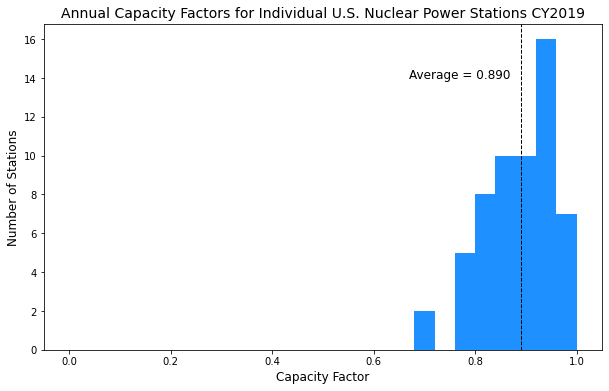

In [121]:
bins1 = [x for x in np.arange(0,1.04,0.04)]
plt.figure(figsize=(10,6))
plt.axvline(x=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.title("Annual Capacity Factors for Individual U.S. Nuclear Power Stations CY2019",fontsize=14)
plt.hist(nuclear_performance['cap_fact'], bins=bins1, color="dodgerblue")
plt.xlabel("Capacity Factor",fontsize=12)
plt.ylabel("Number of Stations",fontsize=12)
plt.text(0.67,14,"Average = 0.890",fontsize=12)
plt.show()

In [122]:
one_unit_cf = nuclear_performance[nuclear_performance['# of Units'] ==1]
multi_unit_cf = nuclear_performance[nuclear_performance['# of Units'] >1]

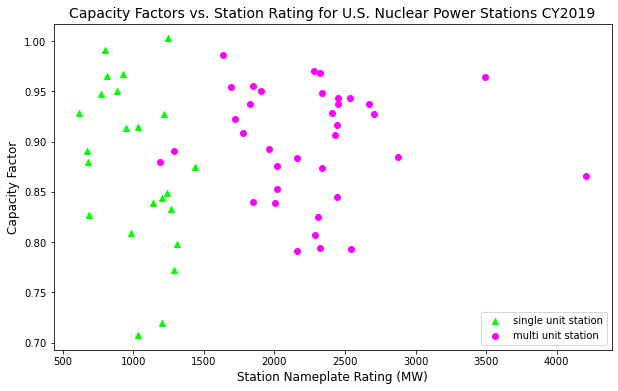

In [123]:
plt.figure(figsize=(10,6))
#plt.ylim(0,1)
#plt.axhline(y=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.title("Capacity Factors vs. Station Rating for U.S. Nuclear Power Stations CY2019",fontsize=14)
#plt.scatter(nuclear_performance['Nameplate Capacity (MW)'], nuclear_performance['cap_fact'], color="dodgerblue")
plt.scatter(one_unit_cf['Nameplate Capacity (MW)'], one_unit_cf['cap_fact'], color="lime", marker = "^",label="single unit station")
plt.scatter(multi_unit_cf['Nameplate Capacity (MW)'], multi_unit_cf['cap_fact'], color="magenta", label="multi unit station")
plt.xlabel("Station Nameplate Rating (MW)",fontsize=12)
plt.ylabel("Capacity Factor",fontsize=12)
#plt.text(3200,0.9,"Average = 0.890",fontsize=12)
plt.legend(loc="lower right")
plt.show()

In [124]:
nuclear_performance['cap_fact'].corr(nuclear_performance['Nameplate Capacity (MW)'])

0.06345861483143041

There is no apparent correlation between capacity factor and plant size for U.S. nuclear plants.

In [125]:
prod_2019.head()

,Plant Id,Plant Name,Plant State,Reported\nFuel Type Code,AER\nFuel Type Code,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Net Generation\n(Megawatthours),YEAR
0,1,Sand Point,AK,DFO,DFO,195.676,217.498,215.544,198.082,215.578,185.236,210.989,233.607,277.39,291.533,221.449,295.418,2758.0,2019
1,1,Sand Point,AK,WND,WND,88.072,80.613,90.25,100.908,89.021,76.538,75.28,68.051,83.408,94.562,85.813,89.484,1022.0,2019
2,2,Bankhead Dam,AL,WAT,HYC,-23.567,-22.044,-25.812,-26.452,-31.6,-27.586,-23.829,-22.872,-18.33,-18.28,-21.282,-22.346,-284.0,2019
3,3,Barry,AL,NG,NG,249734,239279,260061,166618,241896,252882,253399,267202,255971,255736,250232,131877,2824887.0,2019
4,3,Barry,AL,NG,NG,469654,449491,487355,313253,460403,475069,476259,500818,476004,472701,471065,254319,5306391.0,2019


In [126]:
prod_2019[prod_2019['AER\nFuel Type Code']=='NG']['Net Generation\n(Megawatthours)'].sum()

1585716792.698

In [127]:
nuclear_total = prod_2019[prod_2019['AER\nFuel Type Code']=='NUC']['Net Generation\n(Megawatthours)'].sum()
nuclear_total

809409262.0

In [128]:
prod_total= prod_2019['Net Generation\n(Megawatthours)'].sum()
prod_total

4126882142.1049995

In [129]:
prod_2019.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].sum().sort_values(ascending=False)/prod_total

AER\nFuel Type Code
NG     0.384241
COL    0.232148
NUC    0.196131
WND    0.071460
HYC    0.069756
SUN    0.017431
WWW    0.009340
MLG    0.004013
GEO    0.003749
OTH    0.003231
OOG    0.003051
WOC    0.001674
PC     0.001652
RFO    0.001336
DFO    0.001192
ORW    0.000582
WOO    0.000288
HPS   -0.001275
Name: Net Generation\n(Megawatthours), dtype: float64

In [130]:
gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=10)

Plant Id
56407    2.146889e+07
710      1.907183e+07
7710     1.246264e+07
6043     1.171403e+07
7302     1.145978e+07
55380    1.126750e+07
628      1.072252e+07
55480    1.052672e+07
6042     1.032148e+07
60357    1.016307e+07
Name: Net Generation\n(Megawatthours), dtype: float64

In [168]:
prod_fraction = []
num_plants = 1
total=0

while total < nuclear_total:
    total = gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=num_plants).sum()
    prod_fraction.append(total/nuclear_total)
    num_plants+=1
    
    
#plant_IDs = gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=num_plants).index.tolist()
len(prod_fraction)

128

In [132]:
gas_plants_prod.shape[0]

2454

In [162]:
ng_total = prod_2019[prod_2019['AER\nFuel Type Code']=='NG']['Net Generation\n(Megawatthours)'].sum()
ng_total

1585716792.698

Total nuclear electricity production is 51% of natural gas production

In [163]:
nuclear_total/ng_total

0.51043746634154

In [133]:
num_plants = 1
total=0
prod_fraction =[]

while num_plants < gas_plants_prod.shape[0]:
    total = gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=num_plants).sum()
    prod_fraction.append(total/ng_total)
    num_plants+=1

In [134]:
prod_fraction[50], prod_fraction[100], prod_fraction[200], prod_fraction[400]

(0.2753024366735967,
 0.43862178555326925,
 0.6675711330993053,
 0.8914405890152007)

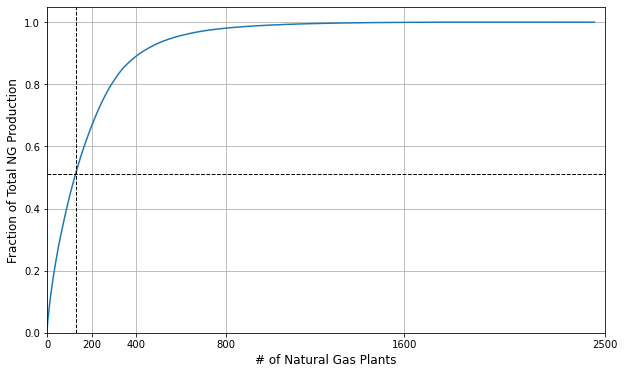

In [167]:
plt.figure(figsize=(10,6))
plt.plot(prod_fraction)
plt.xlim(0,gas_plants_prod.shape[0])
plt.xticks((0,200,400,800,1600,2500))
plt.axhline(y=(nuclear_total/ng_total),color='black', linewidth=1.0, linestyle='--' )
plt.axvline(x=128,color='black', linewidth=1.0, linestyle='--' )
plt.ylim(0,1.05)
plt.grid(axis='both')
plt.xlabel("# of Natural Gas Plants",fontsize=12)
plt.ylabel("Fraction of Total NG Production",fontsize=12)
plt.show()

In [136]:
gas_n128_prod = gas_plants_prod[gas_plants_prod.index.isin(gas_plants_prod['Net Generation\n(Megawatthours)'].nlargest(n=128).index.tolist())]
gas_n128_prod.shape

(128, 16)

In [137]:
gas_n128_prod.columns

Index(['Plant Name', 'Plant State', 'AER\nFuel Type Code', 'Netgen\nJanuary',
       'Netgen\nFebruary', 'Netgen\nMarch', 'Netgen\nApril', 'Netgen\nMay',
       'Netgen\nJune', 'Netgen\nJuly', 'Netgen\nAugust', 'Netgen\nSeptember',
       'Netgen\nOctober', 'Netgen\nNovember', 'Netgen\nDecember',
       'Net Generation\n(Megawatthours)'],
      dtype='object')

In [138]:
all_gas_performance = pd.merge(gas_plants, gas_n128_prod, how='inner', left_index=True, right_index=True)
all_gas_performance.shape

(128, 30)

In [139]:
all_gas_performance.columns

Index(['Plant Name_x', 'State', 'total units', 'Combined Cycle Units',
       'Gas Turbine Units', 'Gas Engine Units', 'Gas Steam Turbine Units',
       'Combined Cycle MW', 'Gas Turbine MW', 'Gas Engine MW',
       'Gas Steam Turbine MW', 'Nameplate Capacity (MW)', 'Operating Year',
       'Operating Month', 'Plant Name_y', 'Plant State', 'AER\nFuel Type Code',
       'Netgen\nJanuary', 'Netgen\nFebruary', 'Netgen\nMarch', 'Netgen\nApril',
       'Netgen\nMay', 'Netgen\nJune', 'Netgen\nJuly', 'Netgen\nAugust',
       'Netgen\nSeptember', 'Netgen\nOctober', 'Netgen\nNovember',
       'Netgen\nDecember', 'Net Generation\n(Megawatthours)'],
      dtype='object')

In [140]:
all_gas_performance['cap_fact'] = all_gas_performance['Net Generation\n(Megawatthours)']/\
                                (all_gas_performance['Nameplate Capacity (MW)']*24*365)

In [141]:
all_gas_performance['cap_fact'].describe()

count    128.000000
mean       0.611930
std        0.131828
min        0.329626
25%        0.520131
50%        0.606133
75%        0.712018
max        0.962151
Name: cap_fact, dtype: float64

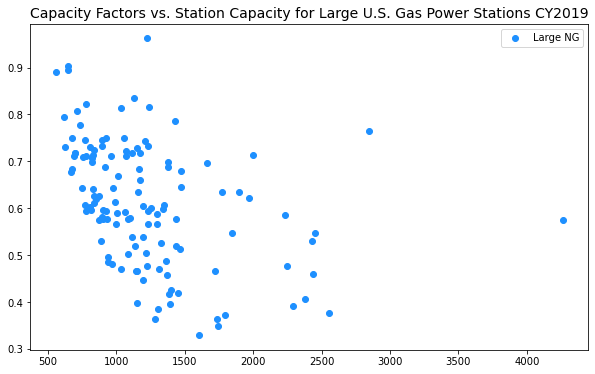

In [142]:
plt.figure(figsize=(10,6))
#plt.ylim(0,1)
#plt.axhline(y=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.title("Capacity Factors vs. Station Capacity for Large U.S. Gas Power Stations CY2019",fontsize=14)
#plt.scatter(nuclear_performance['Nameplate Capacity (MW)'], nuclear_performance['cap_fact'], color="dodgerblue")
#plt.scatter(one_unit_cf['Nameplate Capacity (MW)'], one_unit_cf['cap_fact'], color="dodgerblue", label="single unit station")
plt.scatter(all_gas_performance['Nameplate Capacity (MW)'], all_gas_performance['cap_fact'], color="dodgerblue", label="Large NG")
plt.legend()
plt.show()

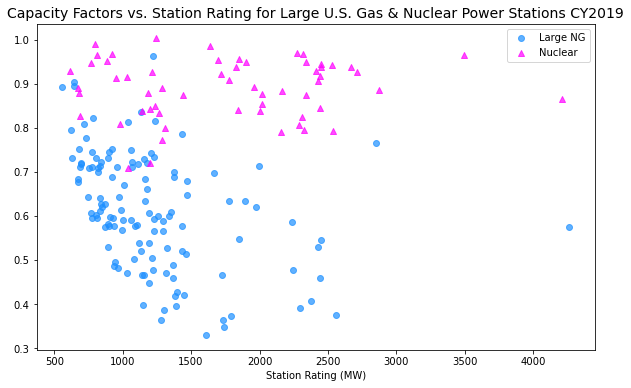

In [158]:
plt.figure(figsize=(10,6))
#plt.ylim(0,1)
#plt.axhline(y=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.title("Capacity Factors vs. Station Rating for Large U.S. Gas & Nuclear Power Stations CY2019",fontsize=14)
#plt.scatter(nuclear_performance['Nameplate Capacity (MW)'], nuclear_performance['cap_fact'], color="dodgerblue")
#plt.scatter(one_unit_cf['Nameplate Capacity (MW)'], one_unit_cf['cap_fact'], color="dodgerblue", label="single unit station")
plt.scatter(all_gas_performance['Nameplate Capacity (MW)'], all_gas_performance['cap_fact'], color="dodgerblue", label="Large NG",alpha=0.7)
plt.scatter(nuclear_performance['Nameplate Capacity (MW)'], nuclear_performance['cap_fact'], color="magenta", label="Nuclear",marker='^',alpha=0.7)
plt.xlabel('Station Rating (MW)')
plt.legend()
plt.show()

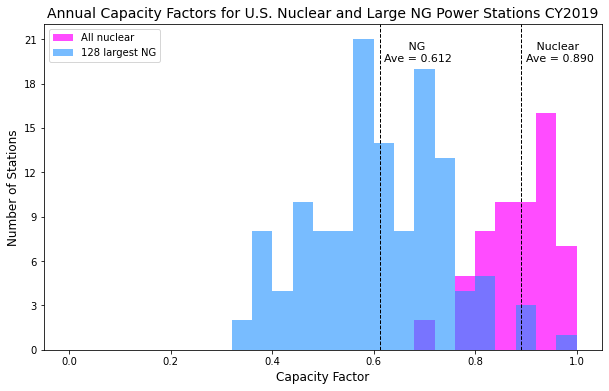

In [152]:
bins1 = [x for x in np.arange(0,1.04,0.04)]
plt.figure(figsize=(10,6))
plt.yticks(range(0,24,3))
plt.axvline(x=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.axvline(x=all_gas_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.title("Annual Capacity Factors for U.S. Nuclear and Large NG Power Stations CY2019",fontsize=14)
plt.hist(nuclear_performance['cap_fact'], bins=bins1, color="magenta", label='All nuclear',alpha=0.7)
plt.hist(all_gas_performance['cap_fact'], bins=bins1, color="dodgerblue", label='128 largest NG',alpha=0.6)
plt.xlabel("Capacity Factor",fontsize=12)
plt.ylabel("Number of Stations",fontsize=12)
plt.text(0.90,19.5,"   Nuclear \nAve = 0.890",fontsize=11)
plt.text(0.62,19.5,"       NG \nAve = 0.612",fontsize=11)
plt.legend()
plt.show()

In [145]:
for i in range(0,12):
    nuclear_performance[month_cf[i]] = nuclear_performance[monthly_gen[i]]/(days[i]*24*nuclear_performance['Nameplate Capacity (MW)'])

In [146]:
nuc_monthly_cp=[]
for i in range(0,12):
    monthly_cp= nuclear_performance[monthly_gen[i]].sum()/(24*days[i]*nuclear_performance['Nameplate Capacity (MW)'].sum())
    nuc_monthly_cp.append(monthly_cp)
    print(month_cf[i] + ": " +str(monthly_cp))

Jan_cf: 0.9500343740929659
Feb_cf: 0.9235805205632873
Mar_cf: 0.8389041447795174
Apr_cf: 0.8069436558948662
May_cf: 0.8652502814080447
Jun_cf: 0.9164874714390537
Jul_cf: 0.9306697629028039
Aug_cf: 0.9269584709849057
Sep_cf: 0.8799731104593854
Oct_cf: 0.7996261645947439
Nov_cf: 0.854156703236186
Dec_cf: 0.9419486171401293


In [147]:
for i in range(0,12):
    all_gas_performance[month_cf[i]] = all_gas_performance[monthly_gen[i]]/(days[i]*24*all_gas_performance['Nameplate Capacity (MW)'])

In [148]:
gas_monthly_cp=[]
for i in range(0,12):
    monthly_cp= all_gas_performance[monthly_gen[i]].sum()/(24*days[i]*all_gas_performance['Nameplate Capacity (MW)'].sum())
    gas_monthly_cp.append(monthly_cp)
    print(month_cf[i] + ": " +str(monthly_cp))

Jan_cf: 0.5619433643151152
Feb_cf: 0.5831289955870586
Mar_cf: 0.5340706486986789
Apr_cf: 0.4771985589152753
May_cf: 0.5492293339569496
Jun_cf: 0.6357205981600303
Jul_cf: 0.695872832638702
Aug_cf: 0.7003924887652117
Sep_cf: 0.6417417557305681
Oct_cf: 0.5573930924181972
Nov_cf: 0.5383314248666696
Dec_cf: 0.5942031308012263


In [149]:
nuc_monthly_cp, gas_monthly_cp

([0.9500343740929659,
  0.9235805205632873,
  0.8389041447795174,
  0.8069436558948662,
  0.8652502814080447,
  0.9164874714390537,
  0.9306697629028039,
  0.9269584709849057,
  0.8799731104593854,
  0.7996261645947439,
  0.854156703236186,
  0.9419486171401293],
 [0.5619433643151152,
  0.5831289955870586,
  0.5340706486986789,
  0.4771985589152753,
  0.5492293339569496,
  0.6357205981600303,
  0.695872832638702,
  0.7003924887652117,
  0.6417417557305681,
  0.5573930924181972,
  0.5383314248666696,
  0.5942031308012263])

In [150]:
monthly_delta = np.array(nuc_monthly_cp)-np.array(gas_monthly_cp)

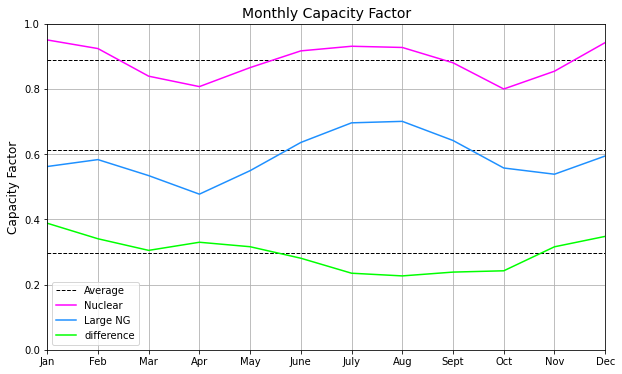

In [161]:
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.figure(figsize=(10,6))
plt.title("Monthly Capacity Factor",fontsize=14)
plt.ylim(0,1)
plt.ylabel('Capacity Factor', fontsize=12)
plt.xlim(0,11)
plt.grid(axis='both')
plt.axhline(y=nuclear_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.axhline(y=all_gas_performance['cap_fact'].mean(),color='black', linewidth=1.0, linestyle='--' )
plt.axhline(y=monthly_delta.mean(),color='black', linewidth=1.0, linestyle='--' , label='Average')
plt.plot(range(0,12,1), nuc_monthly_cp, label='Nuclear',color='magenta')
plt.plot(month_list, gas_monthly_cp, label="Large NG", color='dodgerblue')
plt.plot(month_list, monthly_delta, label="difference",color='lime')
plt.legend()
plt.show()